# Gradient Descent on Simple Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler

In [2]:
df=pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Selecting only price and area for Simple Linear regression

In [3]:
slr_df=df[['price', 'area']]
slr_df.head()

,price,area
0,13300000,7420
1,12250000,8960
2,12250000,9960
3,12215000,7500
4,11410000,7420


### Rescaling the variables

In [4]:
scaler=MinMaxScaler()
slr_df[['price', 'area']]=scaler.fit_transform(slr_df[['price', 'area']])
slr_df.head()

,price,area
0,1.000000,0.396564
1,0.909091,0.502405
2,0.909091,0.571134
3,0.906061,0.402062
4,0.836364,0.396564


# Gradient Descent

In [5]:
X=np.array(slr_df['area'])
y=np.array(slr_df['price'])

In [6]:
def gradient_descent(X, y, current_slope=0, current_intercept=0, iter=1000, learning_rate=0.1):
    grad_desc_df=pd.DataFrame(columns=['slope', 'intercept', 'cost'])
    for i in range(iter):
        cost=sum([i**2 for i in (y - (current_slope * X) - current_intercept)])/len(y)
        slope_diff= 2 * sum(X * (y - (current_slope * X) - current_intercept)) * (- 1)/len(y)
        inter_diff= 2 * sum(y - (current_slope * X) - current_intercept) * (- 1)/len(y)
        current_slope= current_slope - (learning_rate * slope_diff)
        current_intercept= current_intercept - (learning_rate * inter_diff)
        grad_desc_df.loc[i]=[current_slope, current_intercept, cost]
    return(grad_desc_df)

In [7]:
grad_desc_df=gradient_descent(X, y)

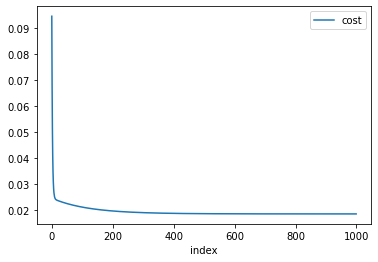

In [8]:
# plotting cost against num_iterations

grad_desc_df.reset_index().plot.line(x='index', y=['cost'])